

# Spatial data analysis 

Liubov, Marc 

See other sources 
* https://github.com/mszell/geospatialdatascience/ 
* Analyze Geospatial Data in Python: GeoPandas and Shapely: https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/
* Automating GIS-Processes: https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html


# Imports



In [1]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 72.4 MB/s eta 0:00:00


In [2]:
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 8.1 MB/s eta 0:00:00


In [3]:
import geopandas as gpd # for data handling - ignore for now
import contextily as ctx # for data plotting - ignore for now

# John Snow and the 1854 cholera outbreak

Let's explore all the data first:

There are:
- [shapefiles](https://en.wikipedia.org/wiki/Shapefile) - they are usually groups of files contaning geospatial vector data, with the same name and extensions like .shp, .shx, .dbf. Here we only care about the .shp file which contains the geometric features.



<img src="files/rastervector.jpg">

## Loading the data and ensuring Coordinate Reference System (CRS) consistency

Load the data - deaths and water pumps:

In [ ]:
deaths_df = gpd.read_file('Cholera_Deaths.shp')
pumps_df = gpd.read_file('Pumps.shp')

In [ ]:
deaths_df.head()

,Id,Count,geometry
0,0,3,POINT (529308.741 181031.352)
1,0,2,POINT (529312.164 181025.172)
2,0,1,POINT (529314.382 181020.294)
3,0,1,POINT (529317.380 181014.259)
4,0,4,POINT (529320.675 181007.872)


In [ ]:
type(deaths_df)

geopandas.geodataframe.GeoDataFrame

We can see how many deaths have occured and where. They are points, and there is an x and a y coordinate. What are they? The shape file's CRS tells us:

In [ ]:
deaths_df.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

The Coordinate Reference System (CRS) handles coordinates: How are coordinates on a sphere projected to the plane?

Sphere coordinates are longitude and latitude. But our maps are flat, not spheres, so we must project. For doing GDS, you must be familiar with the following terms:  
https://en.wikipedia.org/wiki/Longitude  
https://en.wikipedia.org/wiki/Latitude  
https://en.wikipedia.org/wiki/Prime_meridian  
https://en.wikipedia.org/wiki/Map_projection  
https://en.wikipedia.org/wiki/Earth_radius  
https://en.wikipedia.org/wiki/Geoid  
https://en.wikipedia.org/wiki/Spatial_reference_system  
https://en.wikipedia.org/wiki/World_Geodetic_System  
https://en.wikipedia.org/wiki/Grid_reference_system  
https://en.wikipedia.org/wiki/Georeferencing



Now let's look at the pumps. They are also points:

In [ ]:
pumps_df

,Id,geometry
0,0,POINT (529396.539 181025.063)
1,0,POINT (529192.538 181079.391)
2,0,POINT (529183.740 181193.735)
3,0,POINT (529748.911 180924.207)
4,0,POINT (529613.205 180896.804)
5,0,POINT (529453.586 180826.353)
6,0,POINT (529593.727 180660.455)
7,0,POINT (529296.104 180794.849)


It **MUST** have the same CRS, otherwise the two data sources won't match!

Each CRS has a standardized code, the EPSG code: https://epsg.io/  
Compare those and you should be fine:

In [ ]:
pumps_df.crs.to_epsg()

27700

In [ ]:
pumps_df.crs.to_epsg() == deaths_df.crs.to_epsg()

True

## Plotting the data

Ploting deaths:

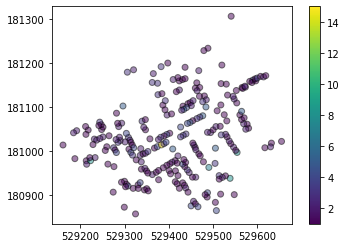

In [ ]:
ax = deaths_df.plot(column='Count', alpha=0.5, edgecolor='k', legend=True)

Let's make it larger and add the pumps:

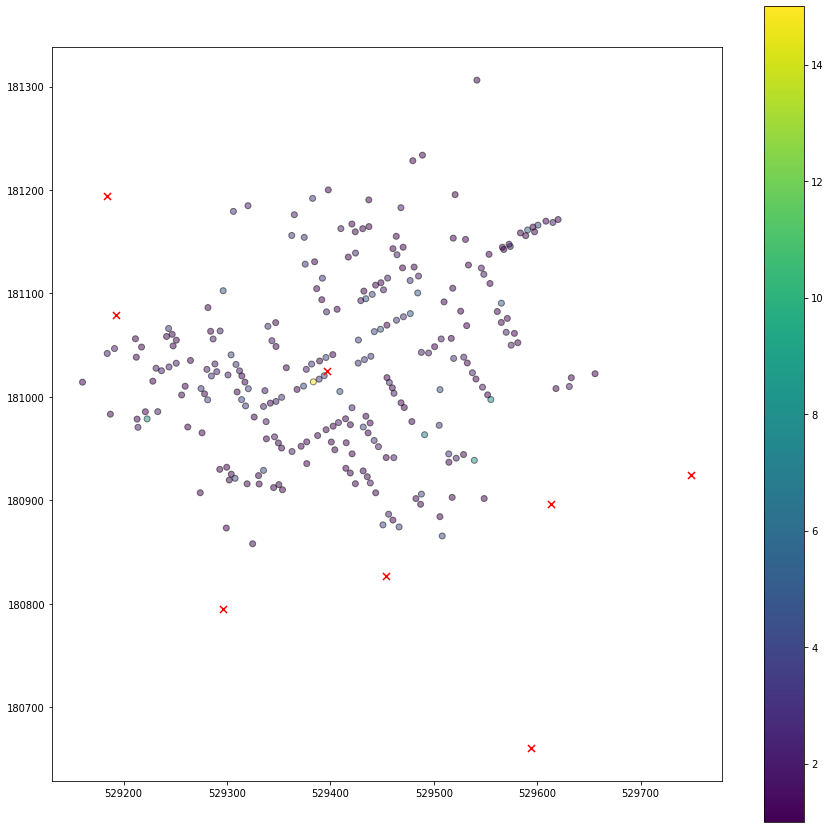

In [ ]:
ax = deaths_df.plot(column='Count', figsize=(15, 15), alpha=0.5, edgecolor='k', legend=True)
pumps_df.plot(ax=ax, marker='x', color='red', markersize=50)

In [ ]:
# Careful, since it is heavy to be loaded with LPI wifi 

ax = deaths_df.plot(column='Count', figsize=(15, 15), alpha=0.5, edgecolor='k', legend=True)
pumps_df.plot(ax=ax, marker='x', color='red', markersize=50);

ctx.add_basemap(ax,
    crs=deaths_df.crs.to_string(),
    # Using the original map, hand-drawn by Snow
    source="SnowMap.tif"
)

In the rest of the course we will learn not just how to visualize geospatial data, but also to analyze it statistically. An important tool for that is shapely, which allows handling and manipulation of geometric shapes.

# Shapely and geometric objects

In this lesson, you will learn how to create and manipulate geometries in Python using the [Shapely Python Package](https://shapely.readthedocs.io/en/stable/manual.html).

**Sources:**

These materials are partly based on [Shapely-documentation](https://shapely.readthedocs.io/en/stable/manual.html) and [Westra
E. (2013), Chapter 3](https://www.packtpub.com/application-development/python-geospatial-development-second-edition).

## Fundamental geometric objects

![Spatial geometric objects](files/geo-points-verts-polys.width-1200.jpg)

## Shapely spatial data model

![Spatial data model](files/SpatialDataModel.png)

*Fundamental geometric objects that can be used in Python with* [Shapely](https://shapely.readthedocs.io/en/stable/manual.html).

The most fundamental geometric objects are `Points`, `Lines` and `Polygons` which are the basic ingredients when working with spatial data in vector format. 
Python has a specific module called [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) for doing various geometric operations. Basic knowledge of using Shapely is fundamental for understanding how geometries are stored and handled in GeoPandas.

**Geometric objects consist of coordinate tuples where:**

-  `Point` -object represents a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).
-  `LineString` -object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples
-  `Polygon` -object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons.

**It is also possible to have a collection of geometric objects (e.g. Polygons with multiple parts):**

-  `MultiPoint` -object represents a collection of points and consists of a list of coordinate-tuples
-  `MultiLineString` -object represents a collection of lines and consists of a list of line-like sequences
-  `MultiPolygon` -object represents a collection of polygons that consists of a list of polygon-like sequences that construct from exterior ring and (possible) hole list tuples

**Useful attributes and methods in Shapely include:**

-  Creating lines and polygons based on a collection of point objects.
-  Calculating areas/length/bounds etc. of input geometries
-  Conducting geometric operations based on the input geometries such as `union`, `difference`, `distance` etc.
-  Conducting spatial queries between geometries such as `intersects`, `touches`, `crosses`, `within` etc.


## Point

Creating point is easy, you pass x and y coordinates into `Point()` -object (+ possibly also z -coordinate):

In [4]:
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

Let's see what these variables now contain: 

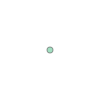

In [8]:
point3D

As we see here, Jupyter notebook is able to display the shape directly on the screen.

We can use the print statement to get information about the actual definition of these objects:

In [7]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


3D-point can be recognized from the capital Z -letter in front of the coordinates.

Let's also check the data type of a point:

In [ ]:
type(point1)

We can see that the type of the point is shapely's Point. The point object is represented in a specific format based on
[GEOS](https://trac.osgeo.org/geos) C++ library that is one of the standard libraries behind various Geographic Information Systems. It runs under the hood e.g. in [QGIS](http://www.qgis.org/en/site/). 

### Point attributes and functions

Points and other shapely objects have useful built-in [attributes and methods](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods). Using the available attributes, we can for example extract the coordinate values of a Point and calculate the Euclidian distance between points.

In [ ]:
dir(point1)

`geom_type` attribute contains information about  the geometry type of the Shapely object:

In [ ]:
point1.geom_type

Extracting the coordinates of a Point can be done in a couple of different ways:

`coords` attribute contains the coordinate information as a `CoordinateSequence` which is another data type related to Shapely.

In [9]:
# Get xy coordinate tuple
list(point1.coords)

[(2.2, 4.2)]

Here we have a coordinate tuple inside a list. Using the attributes `x` and `y` it is possible to get the coordinates directly as plain decimal numbers.

In [ ]:
# Read x and y coordinates separately
x = point1.x
y = point1.y

In [ ]:
print( x, y)

It is also possible to calculate the distance between two objects using the [distance](https://shapely.readthedocs.io/en/stable/manual.html#object.distance) method. In our example the distance is calculated in a cartesian coordinate system. When working with real GIS data the distance is based on the used coordinate reference system. always check what is the unit of measurement (for example, meters) in the coordinate reference system you are using.

Let's calculate the distance between `point1` and `point2`:

In [ ]:
# Check input data
print(point1)
print(point2)

In [10]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)

# Print out a nicely formatted info message
print(f"Distance between the points is {dist} units")

Distance between the points is 29.723559679150142 units


## LineString


Creating LineString -objects is fairly similar to creating Shapely Points. 

Now instead using a single coordinate-tuple we can construct the line using either a list of shapely Point -objects or pass the points as coordinate-tuples:

In [11]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

In [ ]:
# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [ ]:
# Check if lines are identical
line == line2 

Let's see how our line looks like: 

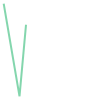

In [12]:
line

In [ ]:
print(line)

As we can see from above, the `line` -variable constitutes of multiple coordinate-pairs.

Check also the data type:

In [ ]:
# Check data type of the line object
type(line)

In [ ]:
# Check geometry type of the line object
line.geom_type

### LineString attributes and functions


`LineString` -object has many useful built-in attributes and functionalities. It is for instance possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point and simplify the geometry. See full list of functionalities from [Shapely documentation](http://toblerity.org/shapely/manual.html). Here, we go through a few of them.

We can extract the coordinates of a LineString similarly as with `Point`

In [ ]:
# Get xy coordinate tuples
list(line.coords)

Again, we have a list of coordinate tuples (x,y) inside a list.

If you would need to access all x-coordinates or all y-coordinates of the line, you can do it directly using the `xy` attribute: 

In [ ]:
# Extract x and y coordinates separately
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

In [ ]:
print(xcoords)
print(ycoords)

It is possible to retrieve specific attributes such as lenght of the line and center of the line (centroid) straight from the LineString object itself:

In [ ]:
# Get the lenght of the line
l_length = line.length
print(f"Length of our line: {l_length} units")

In [ ]:
# Get the centroid of the line
print(line.centroid)

As you can see, the centroid of the line is again a Shapely Point object. 

## Polygon


Creating a `Polygon` -object continues the same logic of how `Point` and `LineString` were created but Polygon object only accepts a sequence of coordinates as input. 

Polygon needs **at least three coordinate-tuples** (three points are reguired to form a surface):

In [13]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

We can also use information from the Shapely Point objects created earlier, but we can't use the point objects directly. Instead, we need to get information of the x,y coordinate pairs as a sequence. We can achieve this by using a list comprehension.

In [14]:
# Create a Polygon based on information from the Shapely points
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

In order to understand what just happened, let's check what the list comprehension produces:

In [ ]:
[[p.x, p.y] for p in [point1, point2, point3]]

This list of lists was passed as input for creating the Polygon.

In [ ]:
# Easier: Just add a list of point objects
poly3 = Polygon([point1, point2, point3])

In [ ]:
# Check that polygon objects created using the different approaches are identical
print(poly == poly2)
print(poly == poly3)

Let's see how our Polygon looks like

In [ ]:
poly

In [ ]:
print(poly)

Notice that `Polygon` representation has double parentheses around the coordinates (i.e. `POLYGON ((<values in here>))` ). This is because Polygon can also have holes inside of it. 

Check also the data type:

In [ ]:
# Data type
type(poly)

In [15]:
# Geometry type
poly.geom_type

'Polygon'

In [16]:
# Check the help for Polygon objects:
help(Polygon)

Help on class Polygon in module shapely.geometry.polygon:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A geometry type representing an area that is enclosed by a linear ring.
 |  
 |  A polygon is a two-dimensional feature and has a non-zero area. It may
 |  have one or more negative-space "holes" which are also bounded by linear
 |  rings. If any rings cross each other, the feature is invalid and
 |  operations on it may fail.
 |  
 |  Parameters
 |  ----------
 |  shell : sequence
 |      A sequence of (x, y [,z]) numeric coordinate pairs or triples, or
 |      an array-like with shape (N, 2) or (N, 3).
 |      Also can be a sequence of Point objects.
 |  holes : sequence
 |      A sequence of objects which satisfy the same requirements as the
 |      shell parameters above
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A s



As the help of [Polygon](https://shapely.readthedocs.io/en/stable/manual.html#polygons) -object tells, a Polygon can be constructed using exterior coordinates and interior coordinates (optional) where the interior coordinates creates a hole inside the Polygon:


Let's see how we can create a `Polygon` with a hole:

In [17]:
# Define the outer border
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [18]:
# Outer polygon
world = Polygon(shell=border)
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


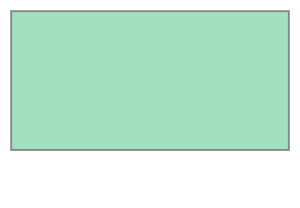

In [19]:
world

In [20]:
# Let's create a single big hole where we leave ten units at the boundaries
# Note: there could be multiple holes, so we need to provide list of coordinates for the hole inside a list
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [ ]:
# Now we can construct our Polygon with the hole inside
frame = Polygon(shell=border, holes=hole)
print(frame)

Let's see what we have now:

In [ ]:
frame

As we can see the `Polygon` has now two different tuples of coordinates. The first one represents the **outerior** and the second one represents the **hole** inside of the Polygon.

### Polygon attributes and functions


We can again access different attributes directly from the `Polygon` object itself that can be really useful for many analyses, such as `area`, `centroid`, `bounding box`, `exterior`, and `exterior-length`. See a full list of methods in the [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html#the-shapely-user-manual).

Here, we can see a few of the available attributes and how to access them:

In [21]:
# Print the outputs
print(f"Polygon centroid: {world.centroid}")
print(f"Polygon Area: {world.area}")
print(f"Polygon Bounding Box: {world.bounds}")
print(f"Polygon Exterior: {world.exterior}")
print(f"Polygon Exterior Length: {world.exterior.length}")

Polygon centroid: POINT (0 0)
Polygon Area: 64800.0
Polygon Bounding Box: (-180.0, -90.0, 180.0, 90.0)
Polygon Exterior: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon Exterior Length: 1080.0


As we can see above, it is again fairly straightforward to access different attributes from the `Polygon` -object. Note that distance metrics will make more sense when we start working with data in a projected coordinate system.

#### Check your understanding

Plot these shapes using Shapely!

- **Pentagon**, example coords: `(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)` 
- **Triangle**   
- **Square**    
- **Circle**    


In [ ]:
# Pentagon - Coordinates borrowed from this thread: https://tex.stackexchange.com/questions/179843/make-a-polygon-with-automatically-labelled-nodes-according-to-their-coordinates
Polygon([(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)])

In [ ]:
# Triangle


In [ ]:
# Square


In [ ]:
# Circle (using a buffer around a point)


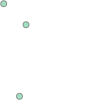

In [26]:
# Check input geometry
multi_point

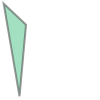

In [27]:
# Convex Hull (smallest polygon around the geometry collection)
multi_point.convex_hull

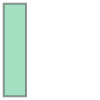

In [30]:
# Envelope (smalles rectangular polygon around the geometry collection): 
multi_point.envelope